# **Simple Data Visualization Exercise with R ggplot2**


In [ ]:
install.packages("gapminder")
install.packages("ggplot2")
install.packages("ggsignif")
install.packages("ggforce")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


In [ ]:
library(gapminder)
library(tidyverse)
library(ggplot2)
library(ggsignif)
library(ggforce)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data1 <- ToothGrowth
glimpse(data1)

Rows: 60
Columns: 3
$ len  <dbl> 4.2, 11.5, 7.3, 5.8, 6.4, 10.0, 11.2, 11.2, 5.2, 7.0, 16.5, 16.5,…
$ supp <fct> VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, V…
$ dose <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, …


In [ ]:
t(data1 %>% map(~sum(is.na(.))))

len,supp,dose
<int>,<int>,<int>
0,0,0


In [ ]:
t(head(data1,3))

,1,2,3
len,4.2,11.5,7.3
supp,VC,VC,VC
dose,0.5,0.5,0.5


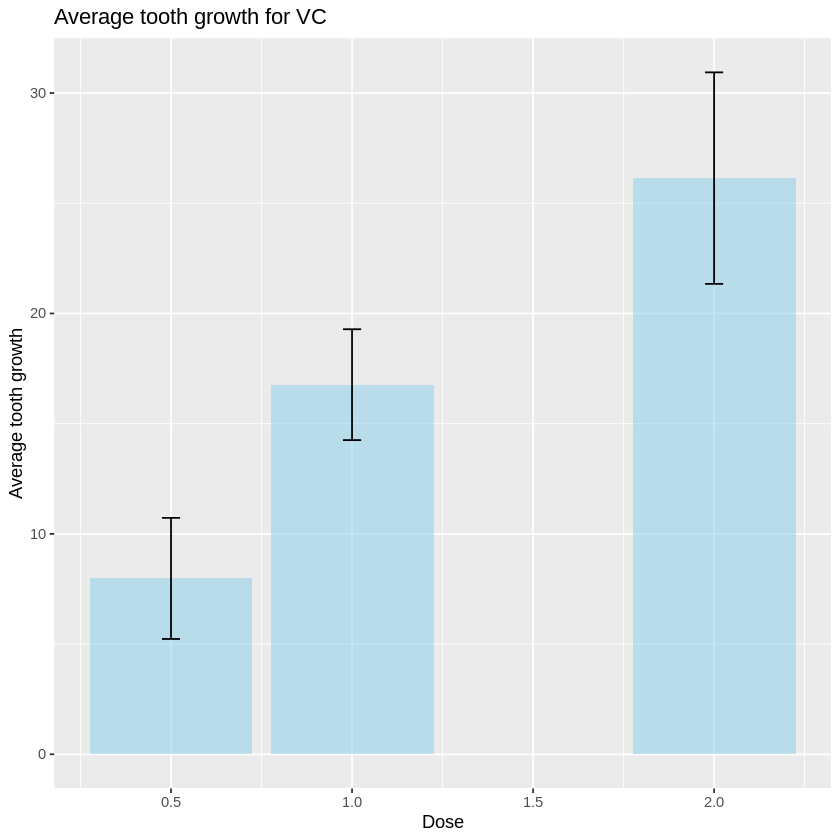

In [ ]:
# barplot with error bars
data1 %>% 
  filter(supp == "VC") %>%
  mutate(dose == as.factor(dose)) %>% 
  group_by(dose) %>%
  summarise(mean_len=mean(len), sd_len=sd(len)) %>%
  ggplot(aes(dose,mean_len)) +
  geom_bar(stat="identity", fill="skyblue", alpha=0.5) +
  geom_errorbar(aes(x=dose, ymin=mean_len-sd_len, ymax=mean_len+sd_len, width=0.05)) +
  labs(title="Average tooth growth for VC") +
  xlab("Dose") + 
  ylab("Average tooth growth")

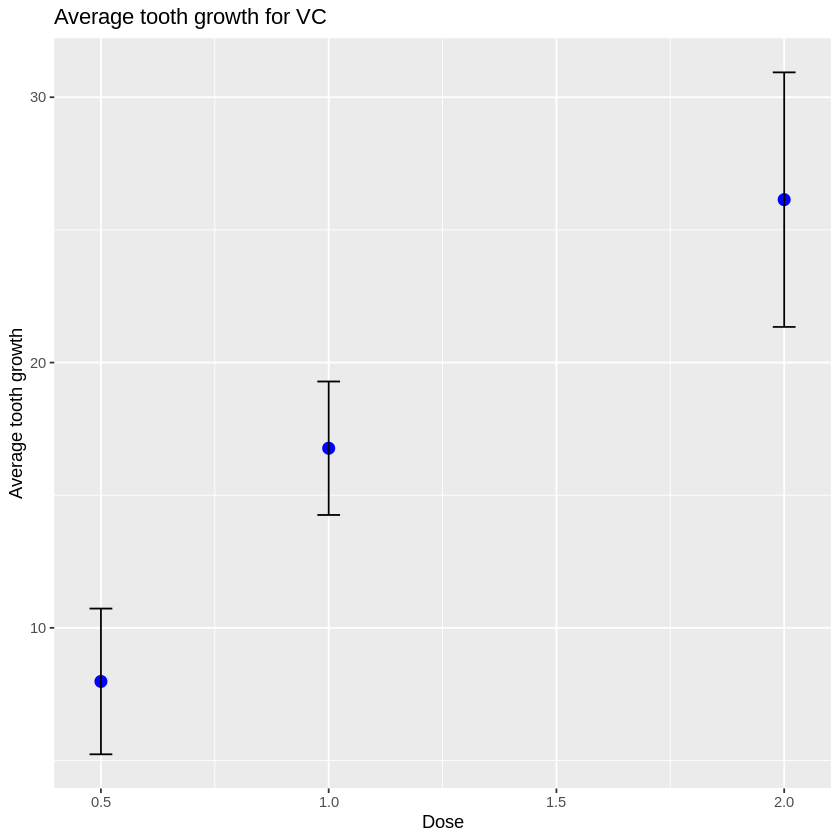

In [ ]:
# pointplot with error bars
data1 %>% 
  filter(supp == "VC") %>%
  mutate(dose == as.factor(dose)) %>% 
  group_by(dose) %>%
  summarise(mean_len=mean(len), sd_len=sd(len)) %>%
  ggplot(aes(dose,mean_len)) +
  geom_point(size=3, color="blue") +
  geom_errorbar(aes(x=dose, ymin=mean_len-sd_len, ymax=mean_len+sd_len, width=0.05)) +
  labs(title="Average tooth growth for VC") +
  xlab("Dose") + 
  ylab("Average tooth growth")

In [ ]:
data2 <- gapminder
glimpse(gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


In [ ]:
head(data2)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [ ]:
t(data2 %>% map(~sum(is.na(.))))

country,continent,year,lifeExp,pop,gdpPercap
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


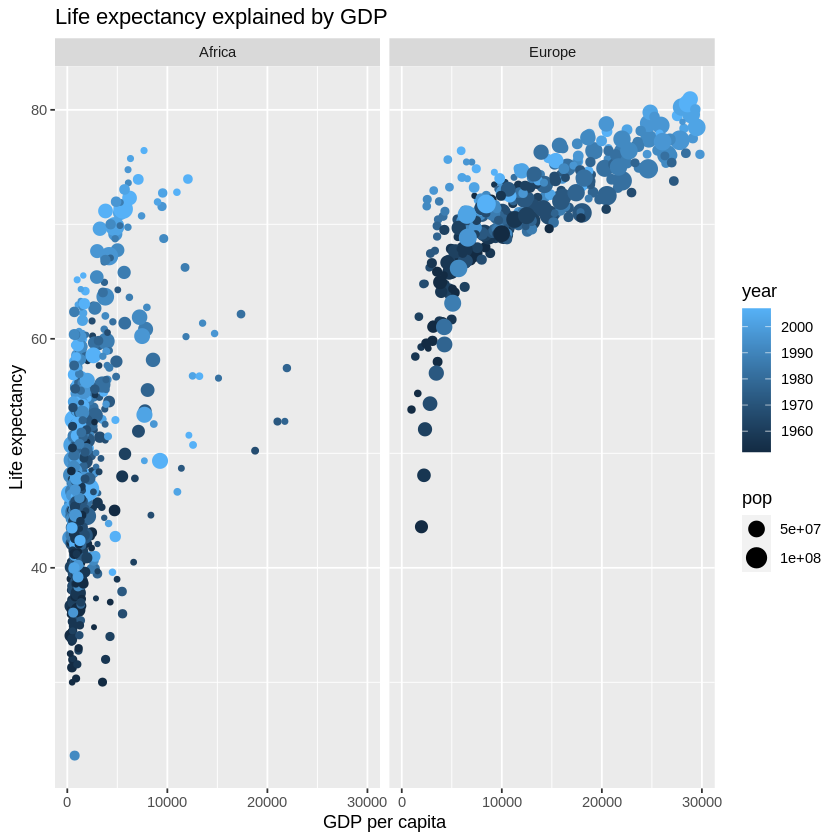

In [ ]:
# basic scatterplot
data2 %>% 
  filter(continent %in% c("Africa", "Europe")) %>%
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(x=gdpPercap,  # skip data argument since inside tidyverse pipe
             y=lifeExp,
             size=pop,  # size of each datapoint will be indicative of population
             color=year)) +  # color of each datapoint is grouped according to year bins
  geom_point() +             # still can add shape on aes
  facet_wrap(~continent) +
  labs(title="Life expectancy explained by GDP",
       x="GDP per capita",
       y="Life expectancy")

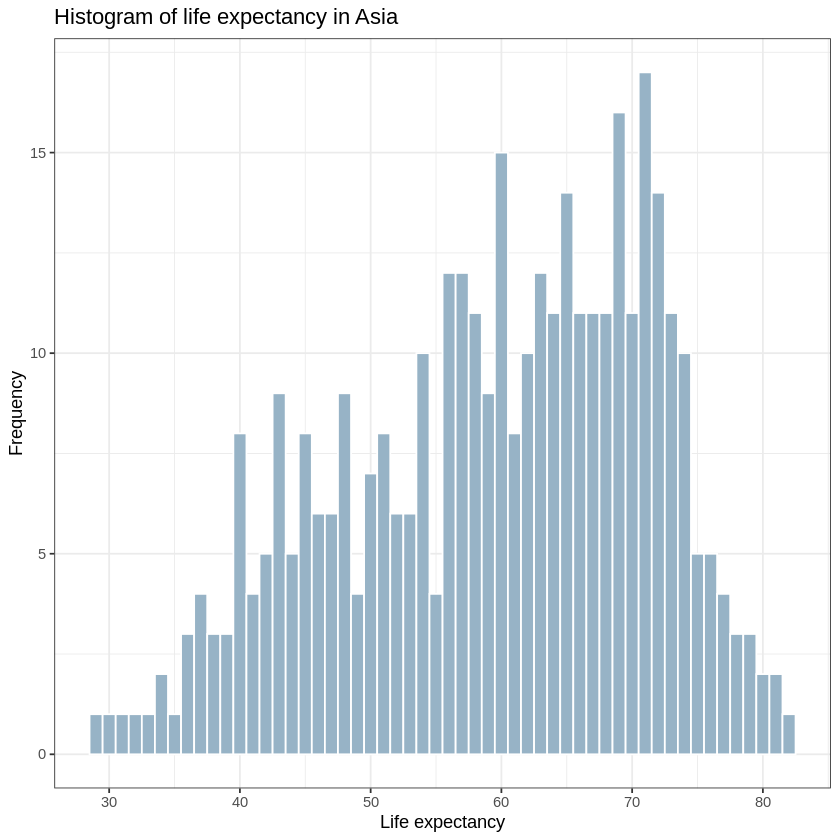

In [ ]:
# histogram
data2 %>% 
  filter(continent == "Asia") %>%
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(x=lifeExp)) +  # skip data argument since inside tidyverse pipe
  geom_histogram(binwidth=1, fill="#97B3C6", color="white") +         
  theme_bw() +             
  labs(title="Histogram of life expectancy in Asia",
       x="Life expectancy",
       y="Frequency")

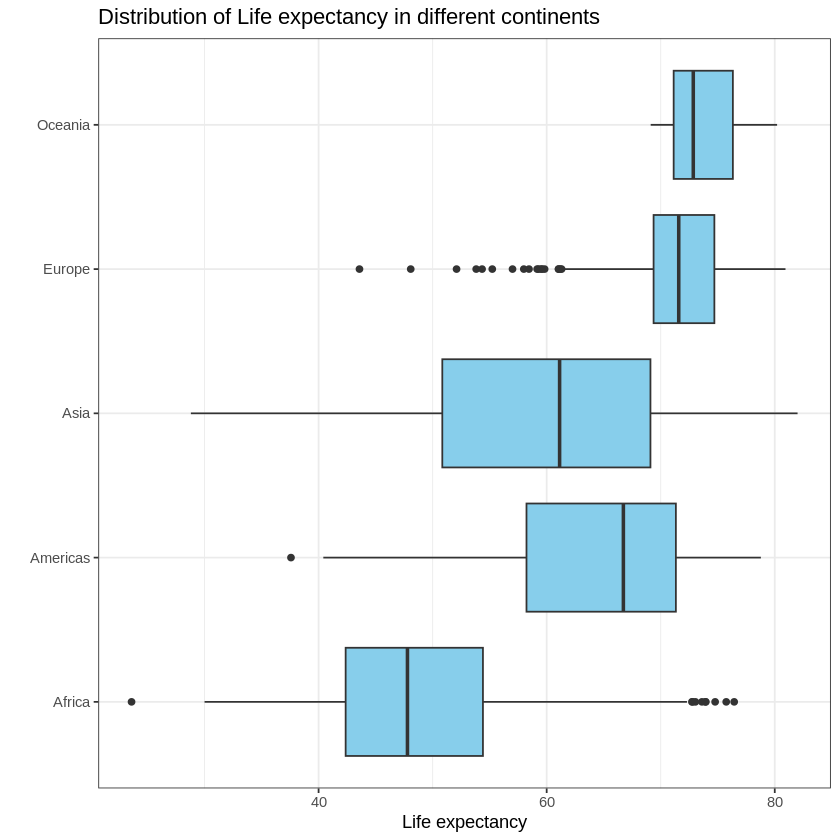

In [ ]:
# base boxplot (with/without datapoints)
data2 %>% 
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(y=continent, x=lifeExp)) +
  geom_boxplot(fill='skyblue') +     # use fill arg in geom layer
  #geom_point(alpha=0.5) +
  labs(x="Life expectancy",
       y="",
       title="Distribution of Life expectancy in different continents") + 
  theme_bw()


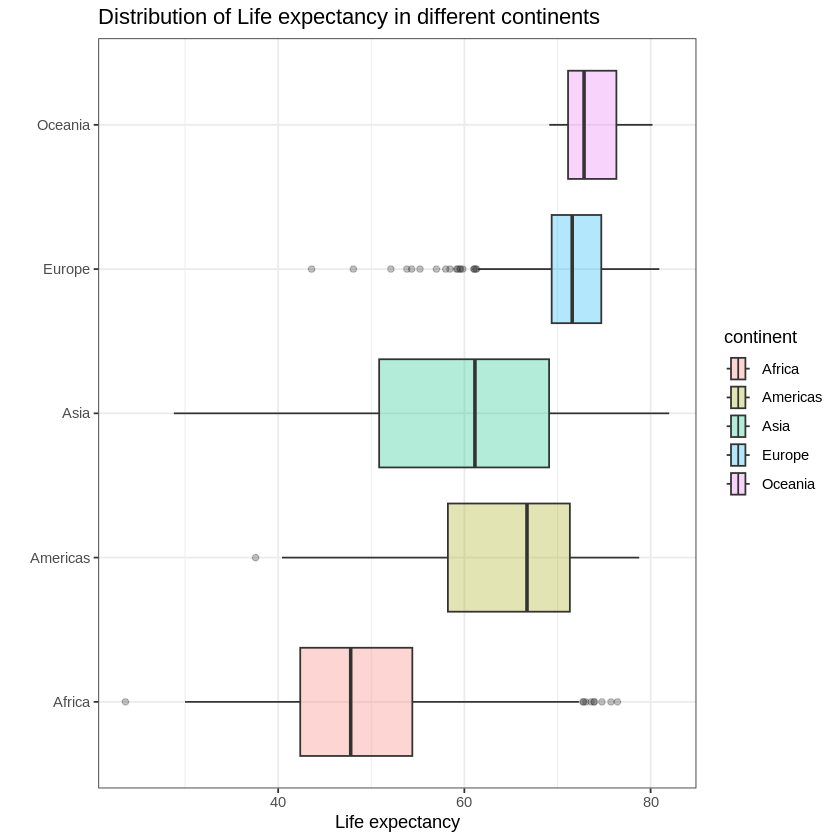

In [ ]:
# filling boxplot of categorical data with different colors
data2 %>% 
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(y=continent, x=lifeExp, fill=continent)) +  # use fill arg in ggplot
  geom_boxplot(alpha=0.3) +
  labs(x="Life expectancy",
       y="",
       title="Distribution of Life expectancy in different continents") + 
  theme_bw()


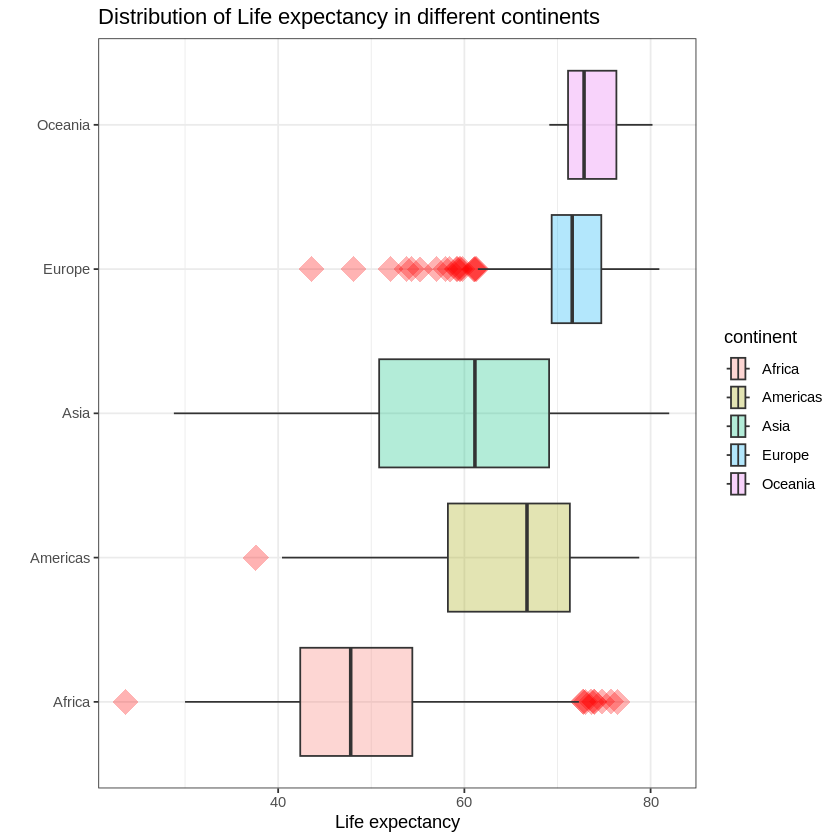

In [ ]:
# customizing outliers 
data2 %>% 
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(y=continent, x=lifeExp, fill=continent)) +  # use fill arg in ggplot
  geom_boxplot(alpha=0.3, notch=FALSE, notchwidth=0.5, outlier.color= "red", outlier.shape=18, outlier.size=7) +
  labs(x="Life expectancy",
       y="",
       title="Distribution of Life expectancy in different continents") + 
  theme_bw()

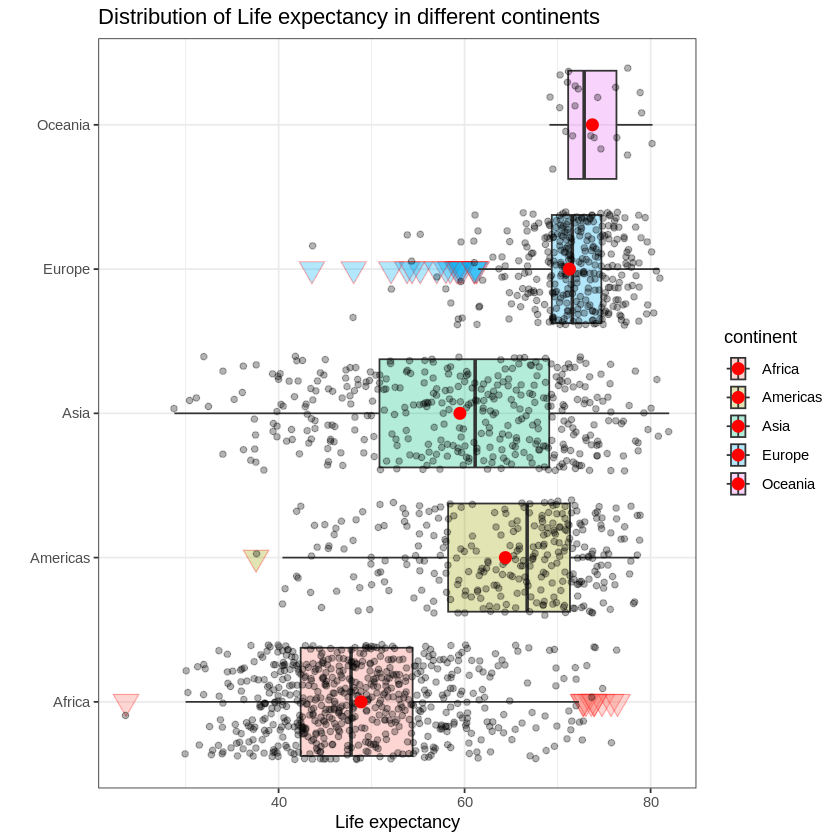

In [ ]:
# add jitter points
data2 %>% 
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(y=continent, x=lifeExp, fill=continent)) +  # use fill arg in ggplot
  geom_boxplot(alpha=0.3, notch=FALSE, notchwidth=0.5, outlier.color= "red", 
               outlier.shape=25, outlier.size=5) +
  geom_jitter(width=0.1, size=1.5, alpha=0.3) +
  stat_summary(fun="mean",geom="point",size=3,color="red") +
  labs(x="Life expectancy",
       y="",
       title="Distribution of Life expectancy in different continents") + 
  theme_bw()

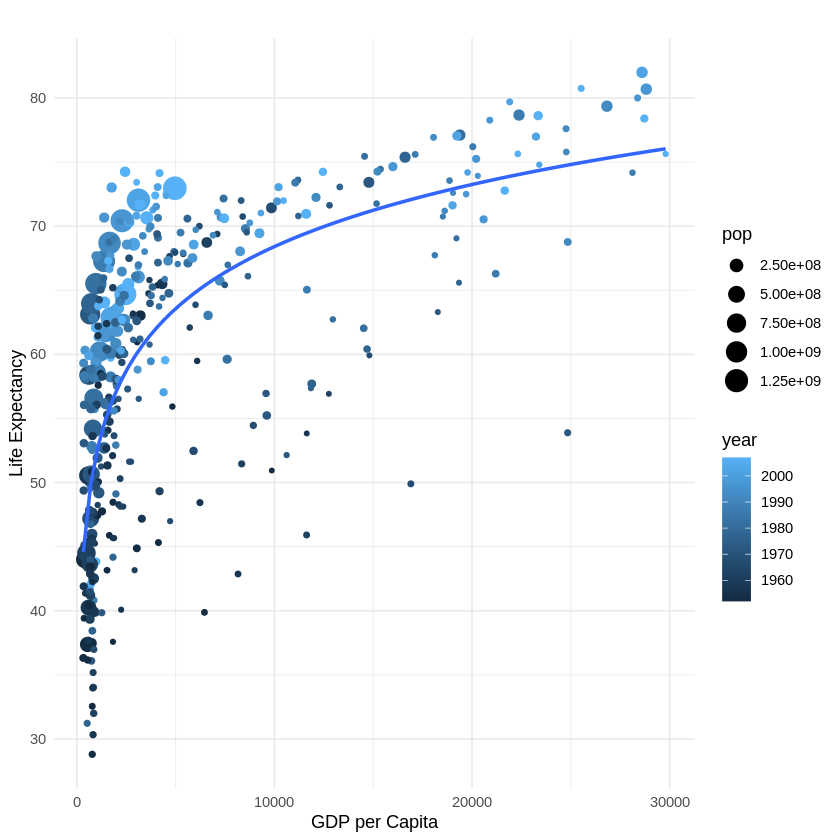

In [ ]:
# scatterplot (2 continuous variables) with trendline
data2 %>% 
  filter(continent == "Asia") %>%
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(x=gdpPercap, y=lifeExp)) +
  geom_point(aes(color=year, size=pop)) +
  geom_smooth(method=lm,formula="y~log(x)",se=F) +  # can set poly(x, n)
  #stat_smooth(method=glm,formula="y~log(x)",se=F) +
  labs(x="GDP per Capita",
       y="Life Expectancy",
       title="") + 
  theme_minimal()

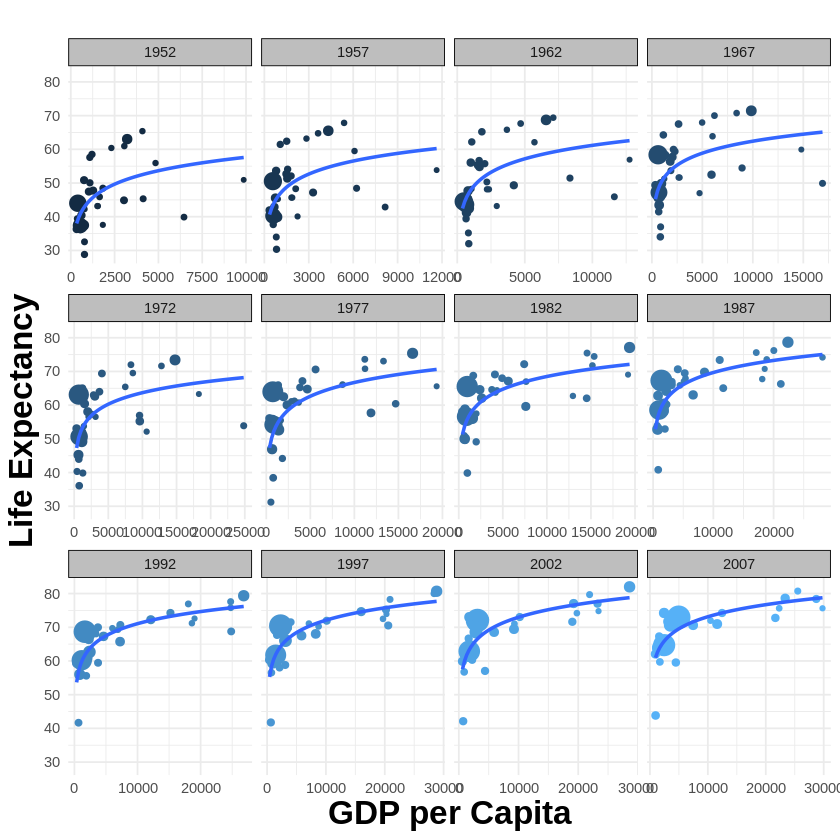

In [ ]:
# scatterplot (2 continuous variables) and separate categories with facet wrap
data2 %>% 
  filter(continent == "Asia") %>%
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(x=gdpPercap, y=lifeExp)) +
  geom_point(aes(color=year, size=pop)) +
  geom_smooth(method=lm,formula="y~log(x)",se=F) +
  facet_wrap(~ year, scales="free_x") +
  labs(x="GDP per Capita",
       y="Life Expectancy",
       title="") + 
  theme_minimal()  +
  theme(legend.position = "below",
        axis.title = element_text(size=20,face="bold"),
        strip.background = element_rect(fill="gray") ) 
 


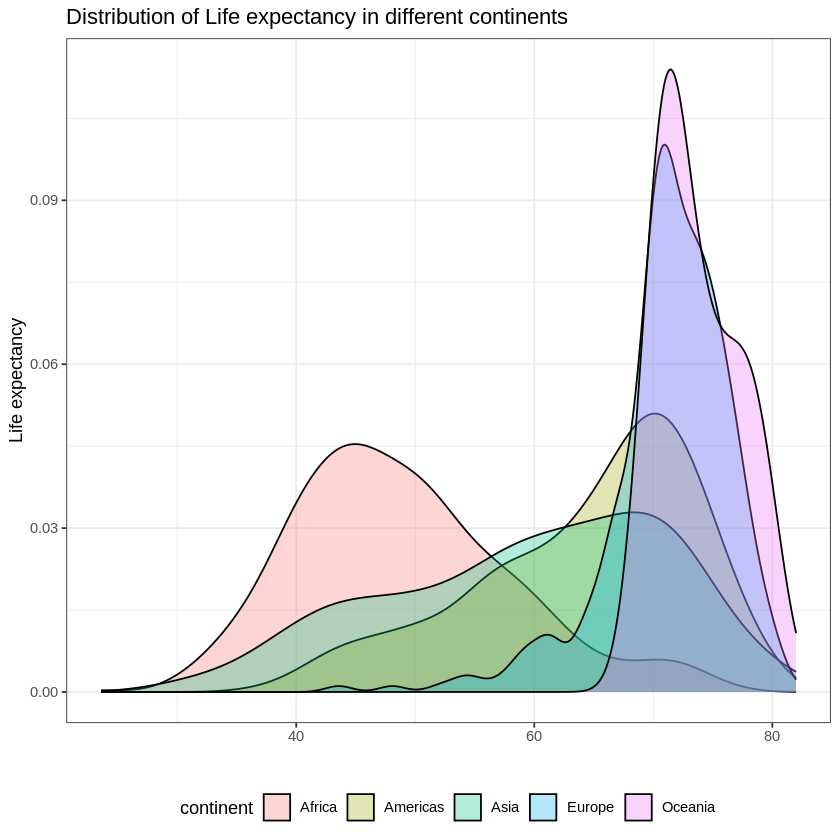

In [ ]:
# density distribution plot, base R
data2 %>% 
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(lifeExp, fill=continent)) +
  geom_density(alpha=0.3) +
  labs(x="",
       y="Life expectancy",
       title="Distribution of Life expectancy in different continents") + 
  theme_bw() +
  theme(legend.position = "bottom")

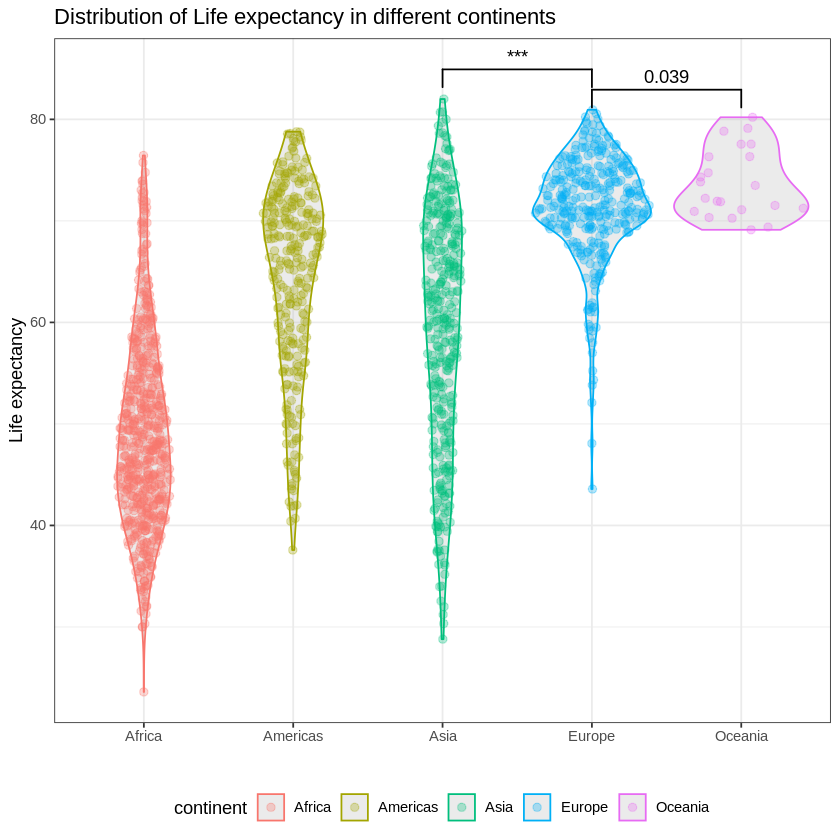

In [ ]:
# violin plot, base R
data2 %>% 
  filter(gdpPercap < 30000) %>%
  ggplot(mapping=aes(y=lifeExp, x=continent)) +
  geom_violin(fill="grey", alpha=0.3, aes(color=continent)) +
  geom_sina(aes(color=continent), alpha=0.3, size=2) +
  labs(x="",
       y="Life expectancy",
       title="Distribution of Life expectancy in different continents") + 
  theme_bw() +
  theme(legend.position = "bottom") +
  ggsignif::geom_signif(comparisons=list(c("Asia","Europe")),map_signif_level = T) +
  ggsignif::geom_signif(comparisons=list(c("Oceania","Europe")),
                        map_signif_level = F, y_position=80)

# References:
1. https://www.youtube.com/watch?v=rfR9Nrpfnyg&list=PPSV
2. https://www.youtube.com/watch?v=gLotp9LRZh4
3. https://ggplot2.tidyverse.org/reference/#geoms